In [1]:
%load_ext autoreload

%autoreload 2
import numpy as np
import corner, sys
import emcee
import getdist
from getdist import plots, MCSamples
%matplotlib inline
import matplotlib.pyplot as plt
sys.path.append('../../modules/')
import numpy as np
#plt.switch_backend("Qt5Agg")
params = {
    "font.family": "serif",
    "font.serif": ["Times", "Times New Roman", "DejaVu Serif"],
    "axes.labelsize": 10,
    "font.size": 10,
    "legend.fontsize": 8,
    "xtick.labelsize": 8,
    "ytick.labelsize": 8,
    "text.usetex": True,
    "figure.figsize": [3.386, 3.386],
    "figure.dpi": 300,
    "savefig.bbox": "tight",
    "savefig.pad_inches": 0.05,
    "axes.linewidth": 0.8,
    "xtick.major.width": 0.8,
    "ytick.major.width": 0.8,
    "xtick.direction": "in",
    "ytick.direction": "in",
    "xtick.top": True,
    "ytick.right": True,
}
plt.rcParams.update(params)

In [2]:
names = ['1','2','3','4','5','6']
labels = [r'\Omega_m', r'\sigma_8', r'\mu^\lambda_0', r'\mu^\lambda_m',r'\mu^\lambda_z',r'\sigma_\lambda']
settings={'mult_bias_correction_order':0,'smooth_scale_2D':4, 'smooth_scale_1D':4, 'boundary_correction_order':0}

In [3]:
n_cut=490000

In [4]:
n_cut=490000
path = '../../capish_sbi_data/config_sbi_DESlike6_corrected_standard_prior_6_params/samples_of_{}_posterior_with_data_flagship_like_sim.pkl'

t = np.load(path.format('count_log10m_masked'), allow_pickle = True)
N_log10m = MCSamples(samples=t[n_cut:],names = names, 
                    labels = labels, 
                     settings=settings, 
                     label=r'count+log10m masked (SBI)')

t = np.load(path.format('log10m_masked'), allow_pickle = True)
log10m = MCSamples(samples=t[n_cut:],names = names, 
                    labels = labels, 
                     settings=settings, 
                     label=r'log10m (SBI)')

t = np.load(path.format('count_masked'), allow_pickle = True)
N_masked = MCSamples(samples=t[n_cut:],names = names, 
                    labels = labels, 
                     settings=settings, 
                     label=r'count-masked (SBI)')

t = np.load(path.format('count'), allow_pickle = True)
N = MCSamples(samples=t[n_cut:],names = names, 
                    labels = labels, 
                     settings=settings, 
                     label=r'count (SBI)')

t = np.load(path.format('Nm'), allow_pickle = True)
Nm = MCSamples(samples=t[n_cut:],names = names, 
                    labels = labels, 
                     settings=settings, 
                     label=r'Nm (SBI)')

t = np.load(path.format('count_Nm'), allow_pickle = True)
count_Nm = MCSamples(samples=t[n_cut:],names = names, 
                    labels = labels, 
                     settings=settings, 
                     label=r'count+Nm (SBI)')

Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in


In [5]:
n_cut=490000
path = '../../capish_sbi_data/config_sbi_DESlike6_corrected_standard_prior_6_params/samples_of_{}_posterior_with_data_flagship_like_sim_one.pkl'

t = np.load(path.format('count'), allow_pickle = True)
N_onesim = MCSamples(samples=t[n_cut:],names = names, 
                    labels = labels, 
                     settings=settings, 
                     label=r'count (SBI, one sim)')

t = np.load(path.format('Nm'), allow_pickle = True)
Nm_onesim = MCSamples(samples=t[n_cut:],names = names, 
                    labels = labels, 
                     settings=settings, 
                     label=r'Nm (SBI, one sim)')

t = np.load(path.format('count_Nm'), allow_pickle = True)
count_Nm_onesim = MCSamples(samples=t[n_cut:],names = names, 
                    labels = labels, 
                     settings=settings, 
                     label=r'count+Nm (SBI, one sim.)')

Removed no burn in
Removed no burn in
Removed no burn in


In [6]:
path = '../../capish_sbi_data/config_sbi_DESlike6_corrected_standard_prior_6_params/samples_of_{}_posterior_with_data_flagship_sim.pkl'

t = np.load(path.format('count_Nm'), allow_pickle = True)
count_Nm_flagship = MCSamples(samples=t[n_cut:],names = names, 
                    labels = labels, 
                     settings=settings, 
                     label=r'count+Nm (SBI, Flagship)')


Removed no burn in


In [7]:
def read_mcmc(file):
    backend = emcee.backends.HDFBackend(file)
    chain = backend.get_chain(discard=0, thin=1, flat=True)  
    print(len(chain))
    return chain

In [54]:
params_fid=[0.319,0.813,3.5,1.72,0,0.2]
minimum = [0.2, 0.6, 
                                                        3.0, 1.3, 
                                                        -0.7, 0.1]
maximum = [0.45, 0.95, 
                                                        4.0, 2.1, 
                                                        0.7, 0.5]

In [55]:
print(minimum)

print(maximum)
range_ = {str(i+1): [minimum[i], maximum[i]] for i in range(len(params_fid))}
#range_ = {'1':[0.2, 0.5], '2':[0.6,0.9], '3':[2.5,4.5], '4':[1, 2.5],'5':[-1,1], '6':[0.1, 0.5], }

[0.2, 0.6, 3.0, 1.3, -0.7, 0.1]
[0.45, 0.95, 4.0, 2.1, 0.7, 0.5]


In [47]:
params_fid=[0.319,0.813,3.5,1.72,0,0.2]
#params_fid=[0.319,0.813,3.5,0.8,0.3]

In [48]:
markers={f'{i+1}':params_fid[i] for i in range(len(params_fid))}

In [49]:
n_cut=20000
settings={'mult_bias_correction_order':0,'smooth_scale_2D':4, 'smooth_scale_1D':4, 'boundary_correction_order':0}
path = '../validation_capish_comparison_to_standard_approach/mcmc_chains/chains_{}.h5'

t = read_mcmc(path.format('count_only'))
N_mcmc = MCSamples(samples=t[n_cut:],names = names, 
                    labels = labels, 
                     settings=settings, 
                     label=r'count (MCMC)')

t = read_mcmc(path.format('mass_only'))
m_mcmc = MCSamples(samples=t[n_cut:],names = names, 
                    labels = labels, 
                     settings=settings, 
                     label=r'log10m (MCMC)')

t = read_mcmc(path.format('count_mass'))
Nm_mcmc = MCSamples(samples=t[n_cut:],names = names, 
                    labels = labels, 
                     settings=settings, 
                     label=r'count+log10m (MCMC)')

47250
Removed no burn in
47850
Removed no burn in
47250
Removed no burn in


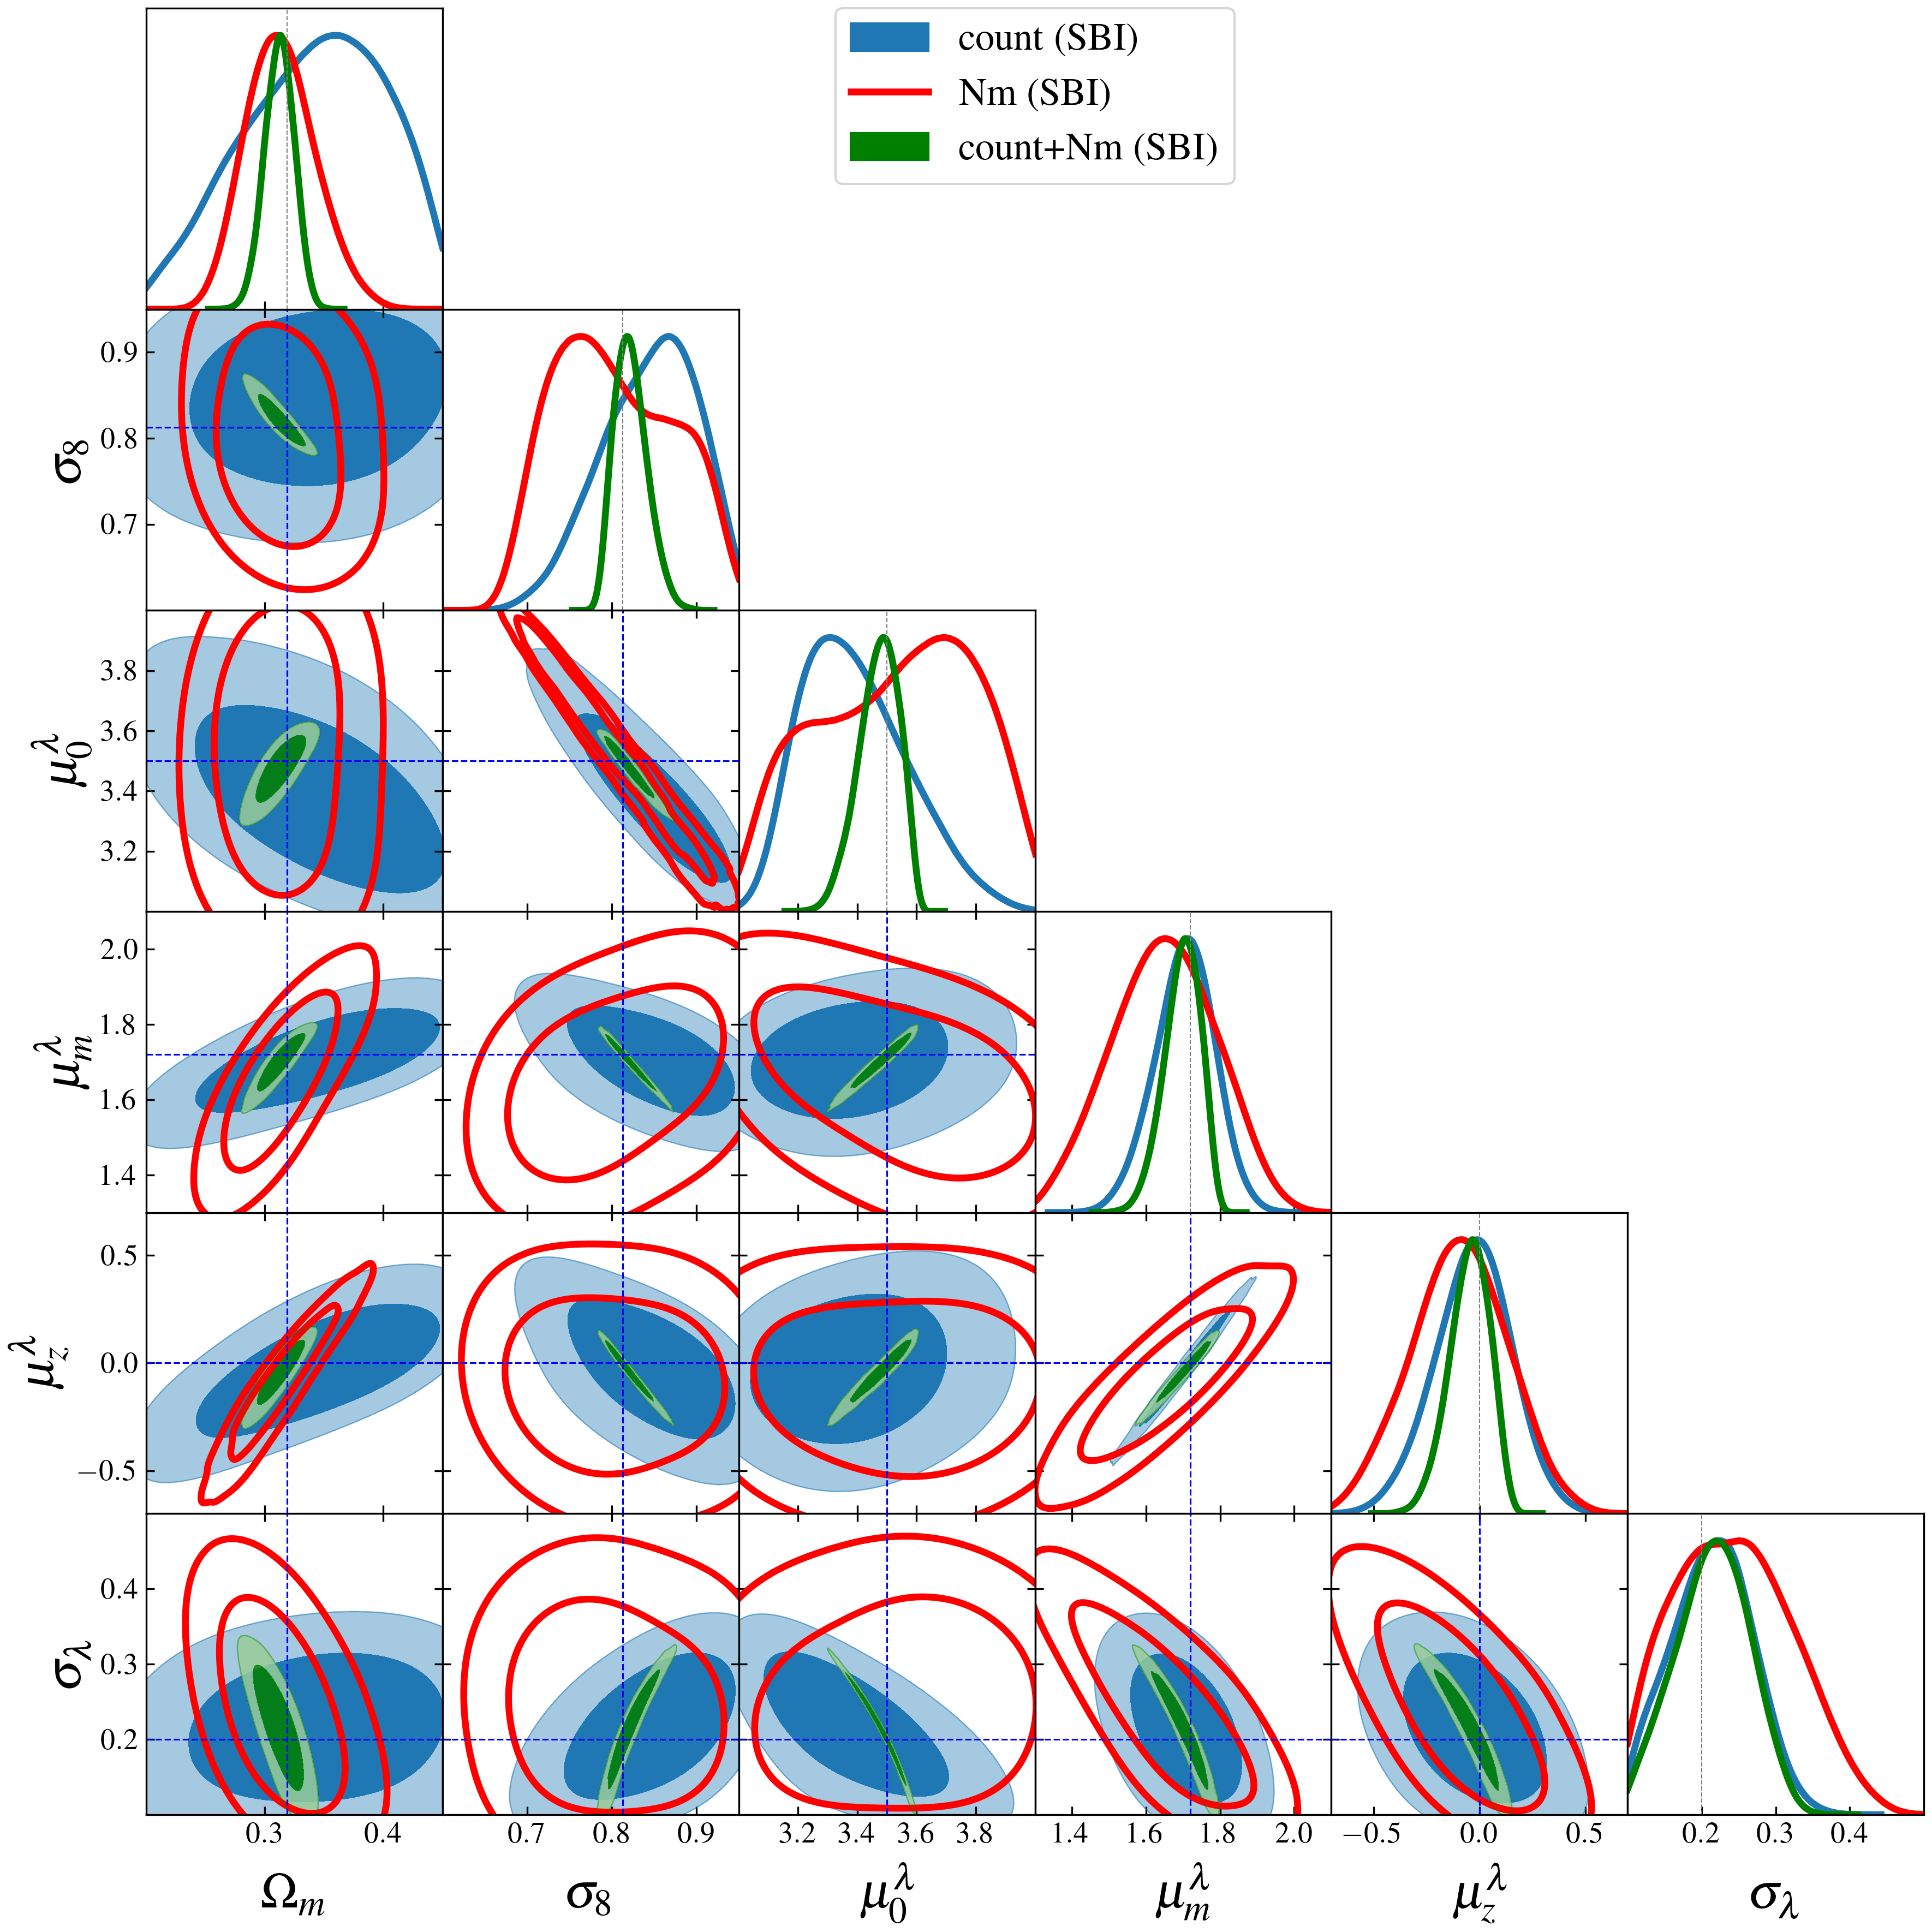

In [50]:
g = plots.get_subplot_plotter(subplot_size=2)
g.settings.lab_fontsize = 25
g.settings.axes_fontsize = 16
g.settings.legend_fontsize = 20
marker_args = {'lw':0.75, 'markersize':0.75, 'ls':'--','color':'b'}
#range_ = {'1':[0.2, 0.5], '2':[0.6,0.9], '3':[2.5,4.5], '4':[1, 2.5],'5':[-1,1], '6':[0.1, 0.5], }
g.triangle_plot([N, Nm, count_Nm, ],
                #[N_Nm_power_law_log10Mwl_no_scatter],
                filled=[True, False, True,False, False, False], 
                contour_colors = ['C0', 'r', 'g','b', 'r', 'g',  ], 
                contour_ls=['-','-','-','--','--','--',],
                contour_lws=[3,3,3,1.5,1.5,1.5],
                #shaded=[False, False, True],
                legend_fontsize = 10,
                params=['1','2','3','4','5','6'],
                markers=markers,
                param_limits = range_,
                fine_bins = 5,  
                marker_args = marker_args)
plt.savefig(f'mcmc_SBI.png', dpi = 300)

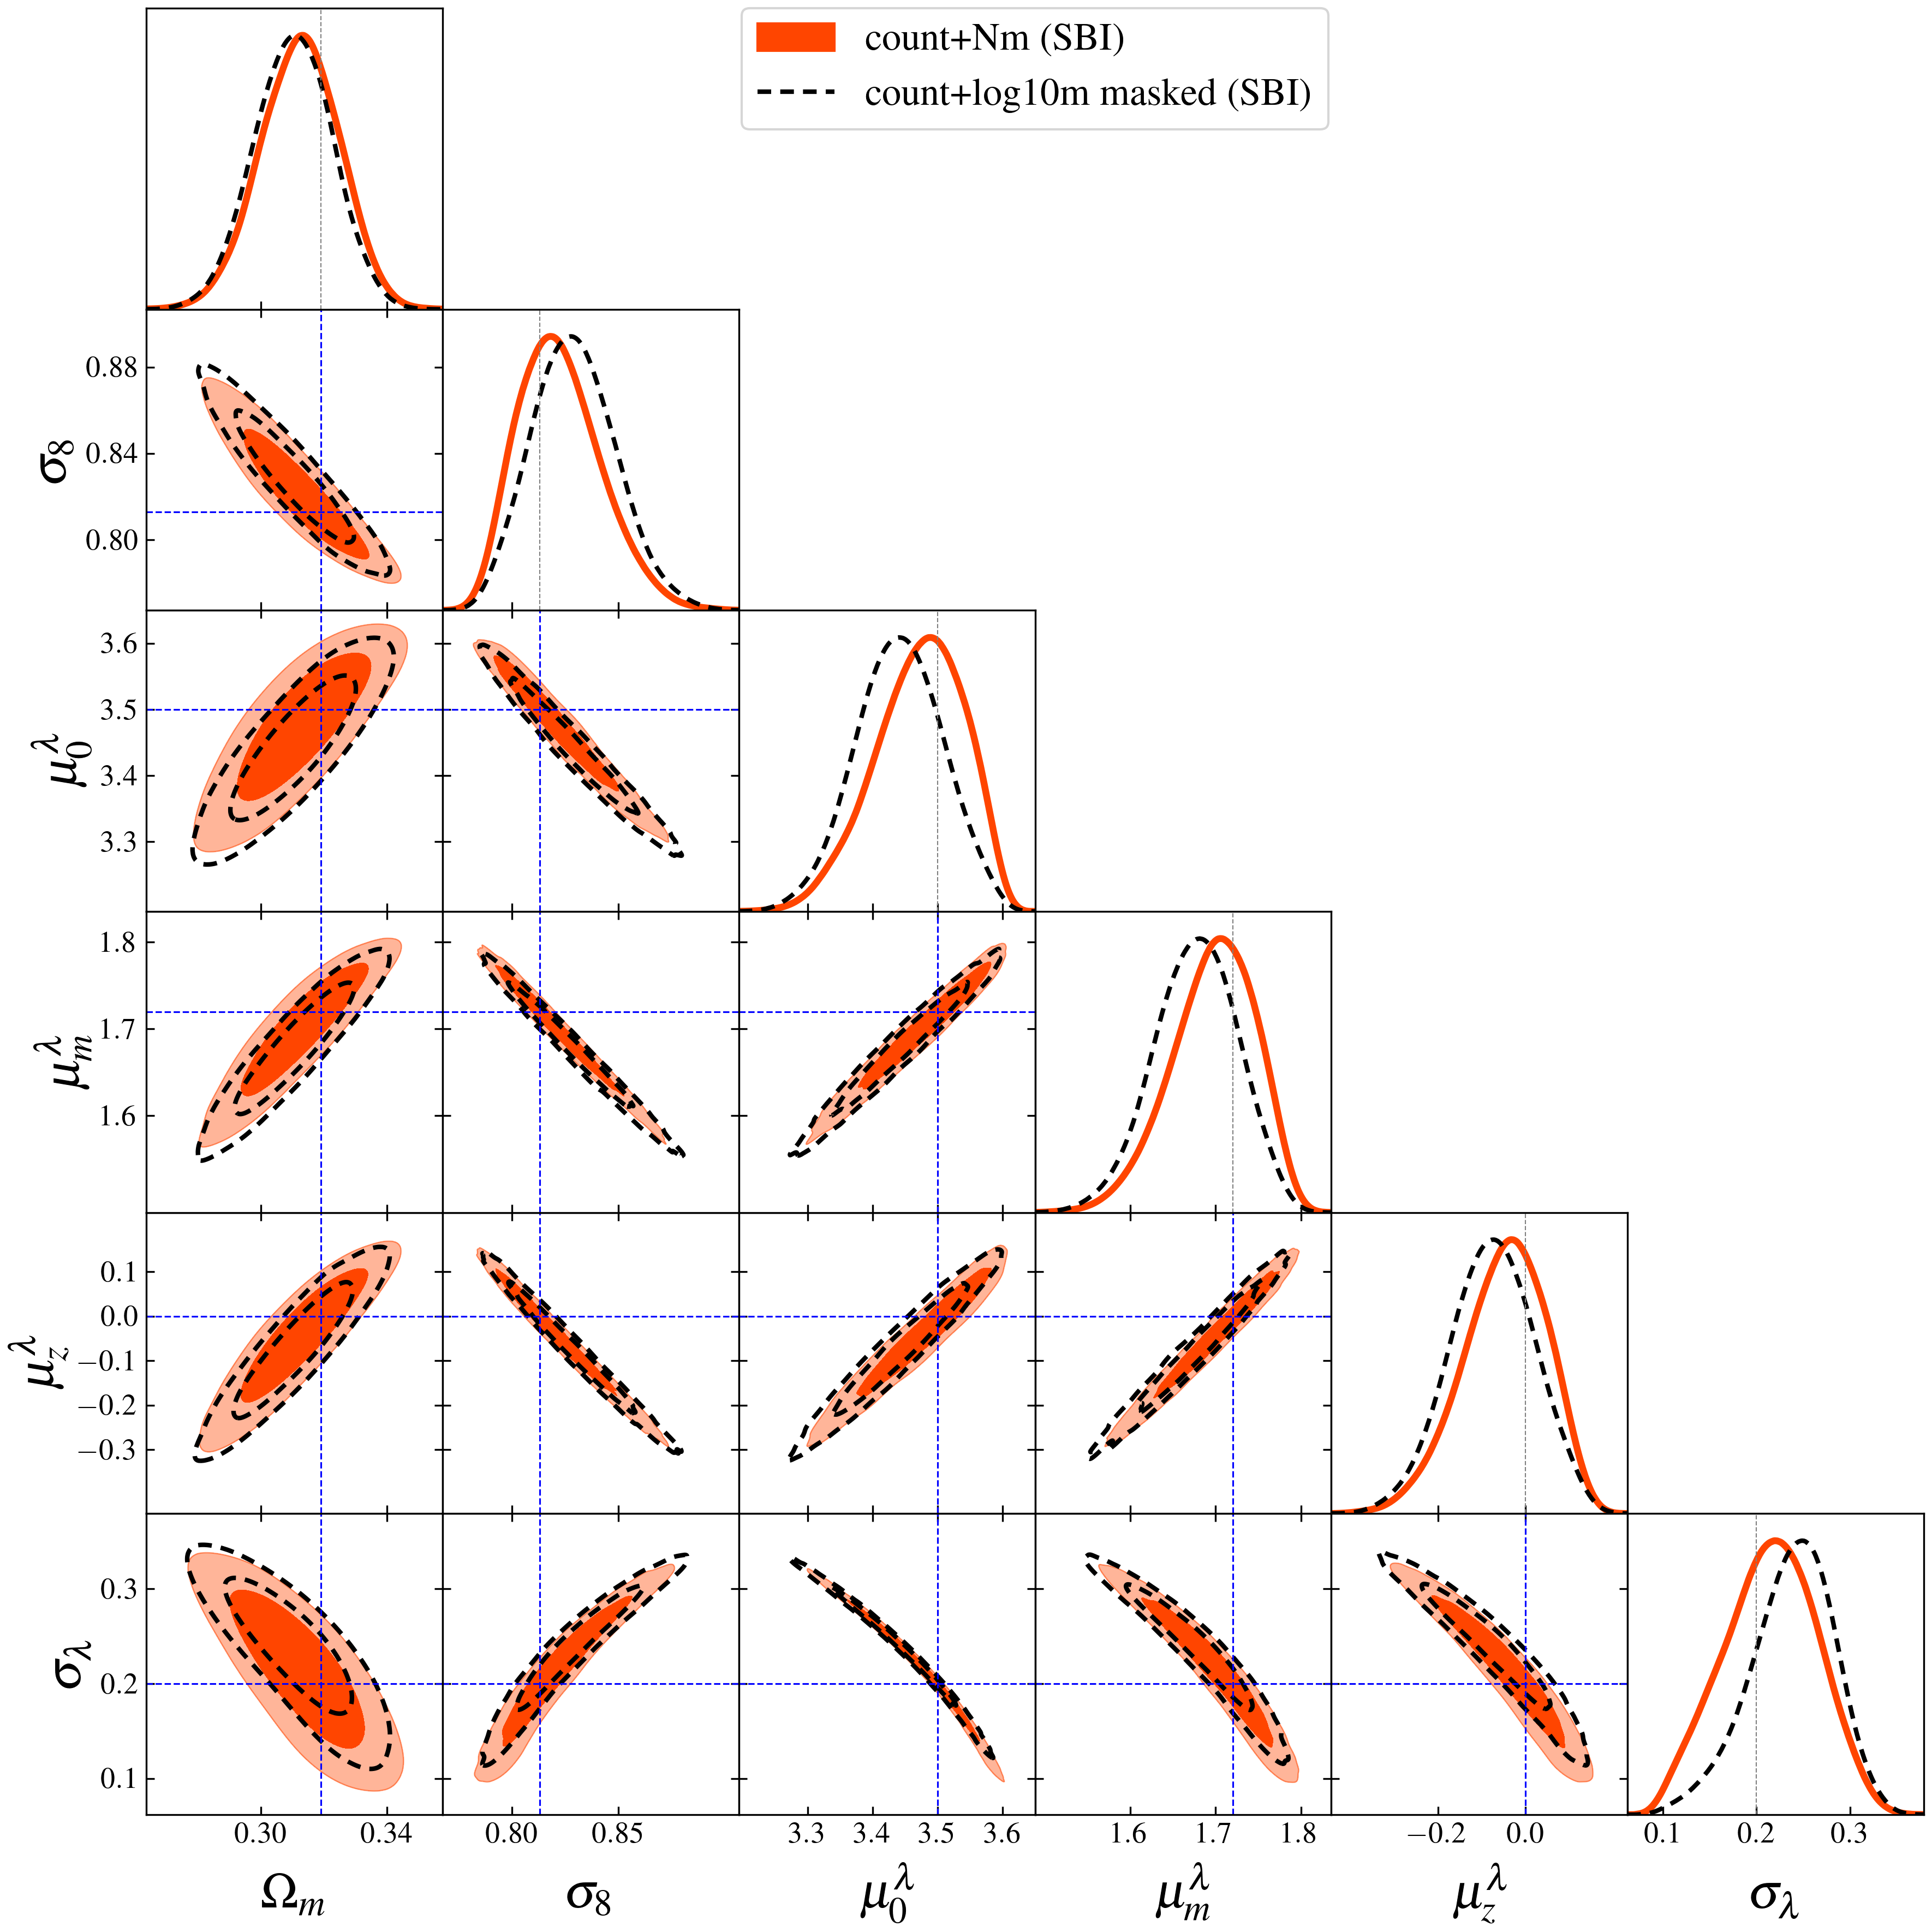

In [51]:
g = plots.get_subplot_plotter(subplot_size=2)
g.settings.lab_fontsize = 25
g.settings.axes_fontsize = 16
g.settings.legend_fontsize = 20
marker_args = {'lw':0.75, 'markersize':0.75, 'ls':'--','color':'b'}
range_ = {'1':[0.2, 0.5], '2':[0.6,0.9], '3':[2.5,4.5], '4':[1, 2.5],'5':[-1,1], '6':[0.1, 0.5], }
g.triangle_plot([count_Nm, N_log10m],
                #[N_Nm_power_law_log10Mwl_no_scatter],
                filled=[True, False, True,False, False, False], 
                contour_colors = ['orangered', 'k', 'g','b', 'r', 'g',  ], 
                contour_ls=['-','--','-','-','--','--',],
                contour_lws=[3,2,3,1,1.5,1.5],
                #shaded=[False, False, True],
                legend_fontsize = 10,
                params=['1','2','3','4','5','6'],
                markers=markers,
                #param_limits = range_,
                fine_bins = 5,  
                marker_args = marker_args)
plt.savefig(f'mcmc_SBI_masked.png', dpi = 300)

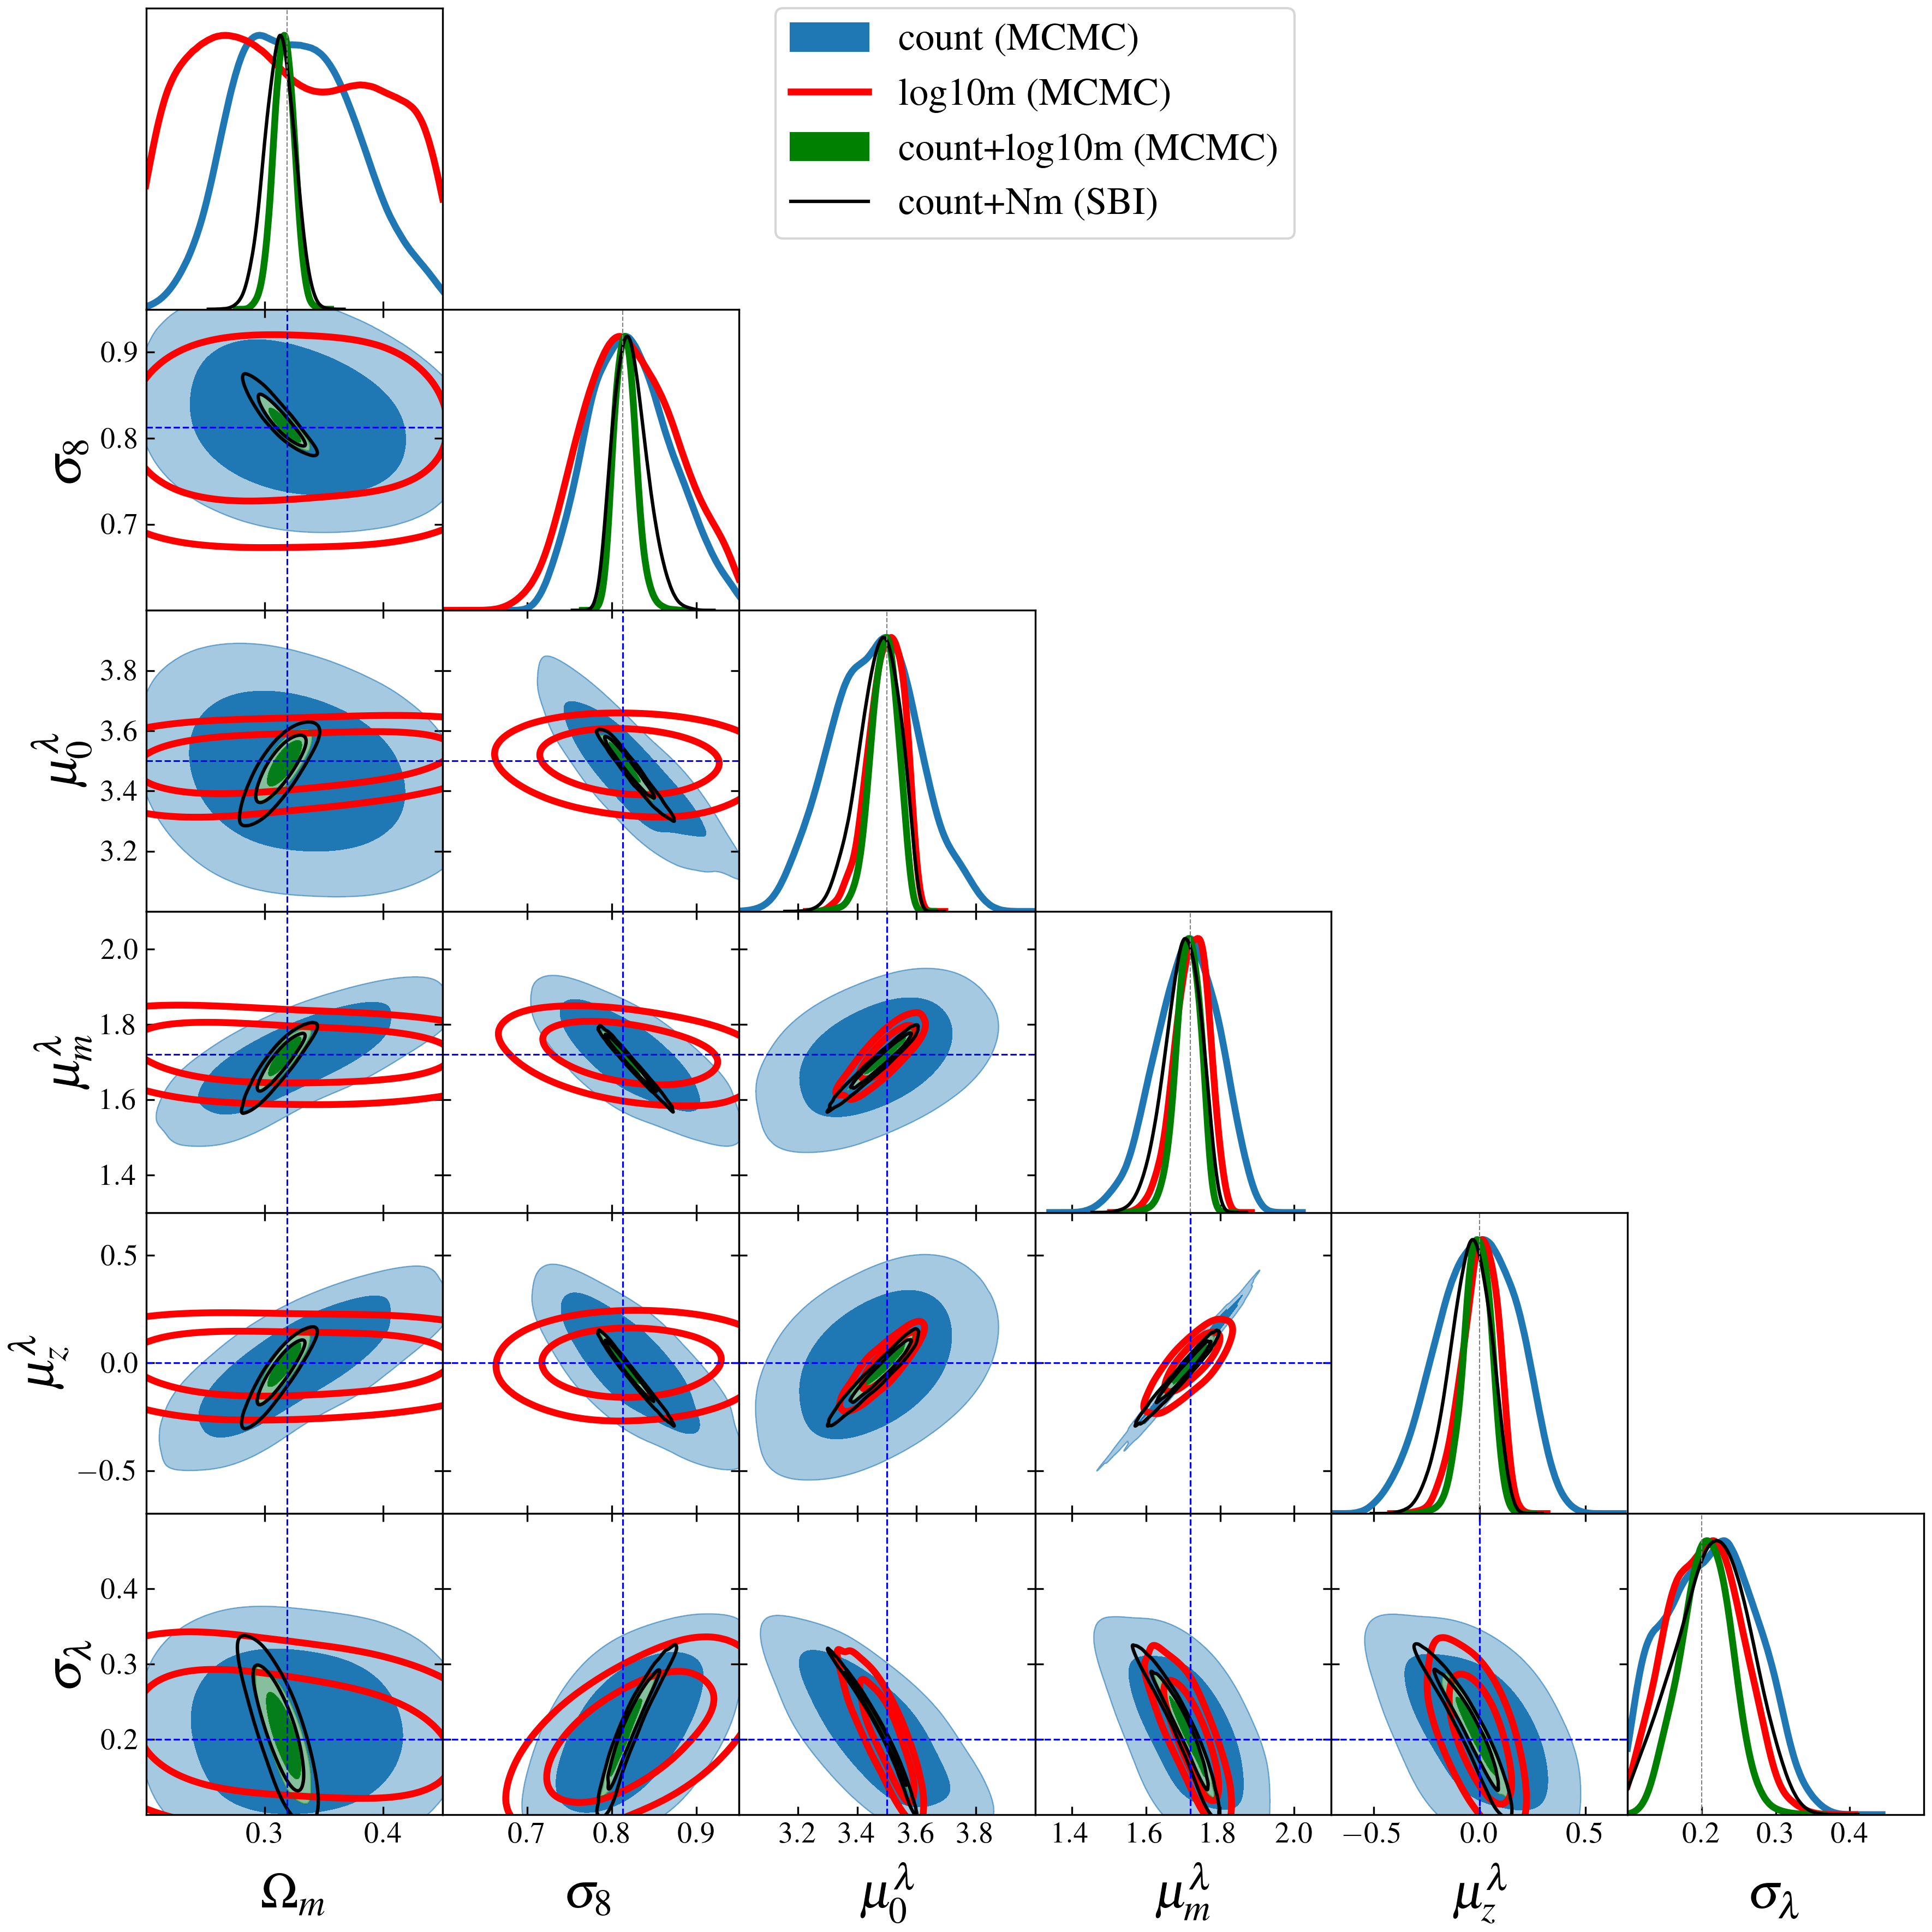

In [57]:
g = plots.get_subplot_plotter(subplot_size=2)
g.settings.lab_fontsize = 25
g.settings.axes_fontsize = 16
g.settings.legend_fontsize = 20
marker_args = {'lw':0.75, 'markersize':0.75, 'ls':'--','color':'b'}
#range_ = {'1':[0.2, 0.5], '2':[0.6,0.9], '3':[2.5,4.5], '4':[1, 2.5],'5':[-1,1], '6':[0.1, 0.5], }
g.triangle_plot([N_mcmc, m_mcmc, Nm_mcmc, count_Nm, ],
                #[N_Nm_power_law_log10Mwl_no_scatter],
                filled=[True, False, True,False, False, False], 
                contour_colors = ['C0', 'r', 'g','k', 'r', 'g',  ], 
                contour_ls=['-','-','-','-','-','--',],
                contour_lws=[3,3,3,1.5,1.5,1.5],
                #shaded=[False, False, True],
                legend_fontsize = 10,
                params=['1','2','3','4','5','6'],
                markers=markers,
                param_limits = range_,
                fine_bins = 5,  
                marker_args = marker_args)
plt.savefig(f'mcmc_standard_likelihood.png', dpi = 300)

In [40]:
# g = plots.get_subplot_plotter(subplot_size=2)
# g.settings.lab_fontsize = 25
# g.settings.axes_fontsize = 16
# g.settings.legend_fontsize = 20
# marker_args = {'lw':0.75, 'markersize':0.75, 'ls':'--','color':'b'}
# #range_ = {'1':[0.2, 0.5], '2':[0.6,0.9], '3':[2.5,4.5], '4':[1, 2.5],'5':[-1,1], '6':[0.1, 0.5], }
# g.triangle_plot([N_mcmc, m_mcmc, Nm_mcmc,count_Nm ],
#                 filled=[True, False, True,False, False, False], 
#                 contour_colors = ['C0', 'r', 'g','b', 'r', 'g',  ], 
#                 contour_ls=['-','-','-','-','--','--',],
#                 contour_lws=[3,3,3,1,1.5,1.5],
#                 #shaded=[False, False, True],
#                 legend_fontsize = 10,
#                 params=['1','2','3','4','5','6'],
#                 markers=markers,
#                 param_limits = range_,
#                 fine_bins = 5,  
#                 marker_args = marker_args)
# plt.savefig(f'mcmc_standard_likelihood.png', dpi = 300)

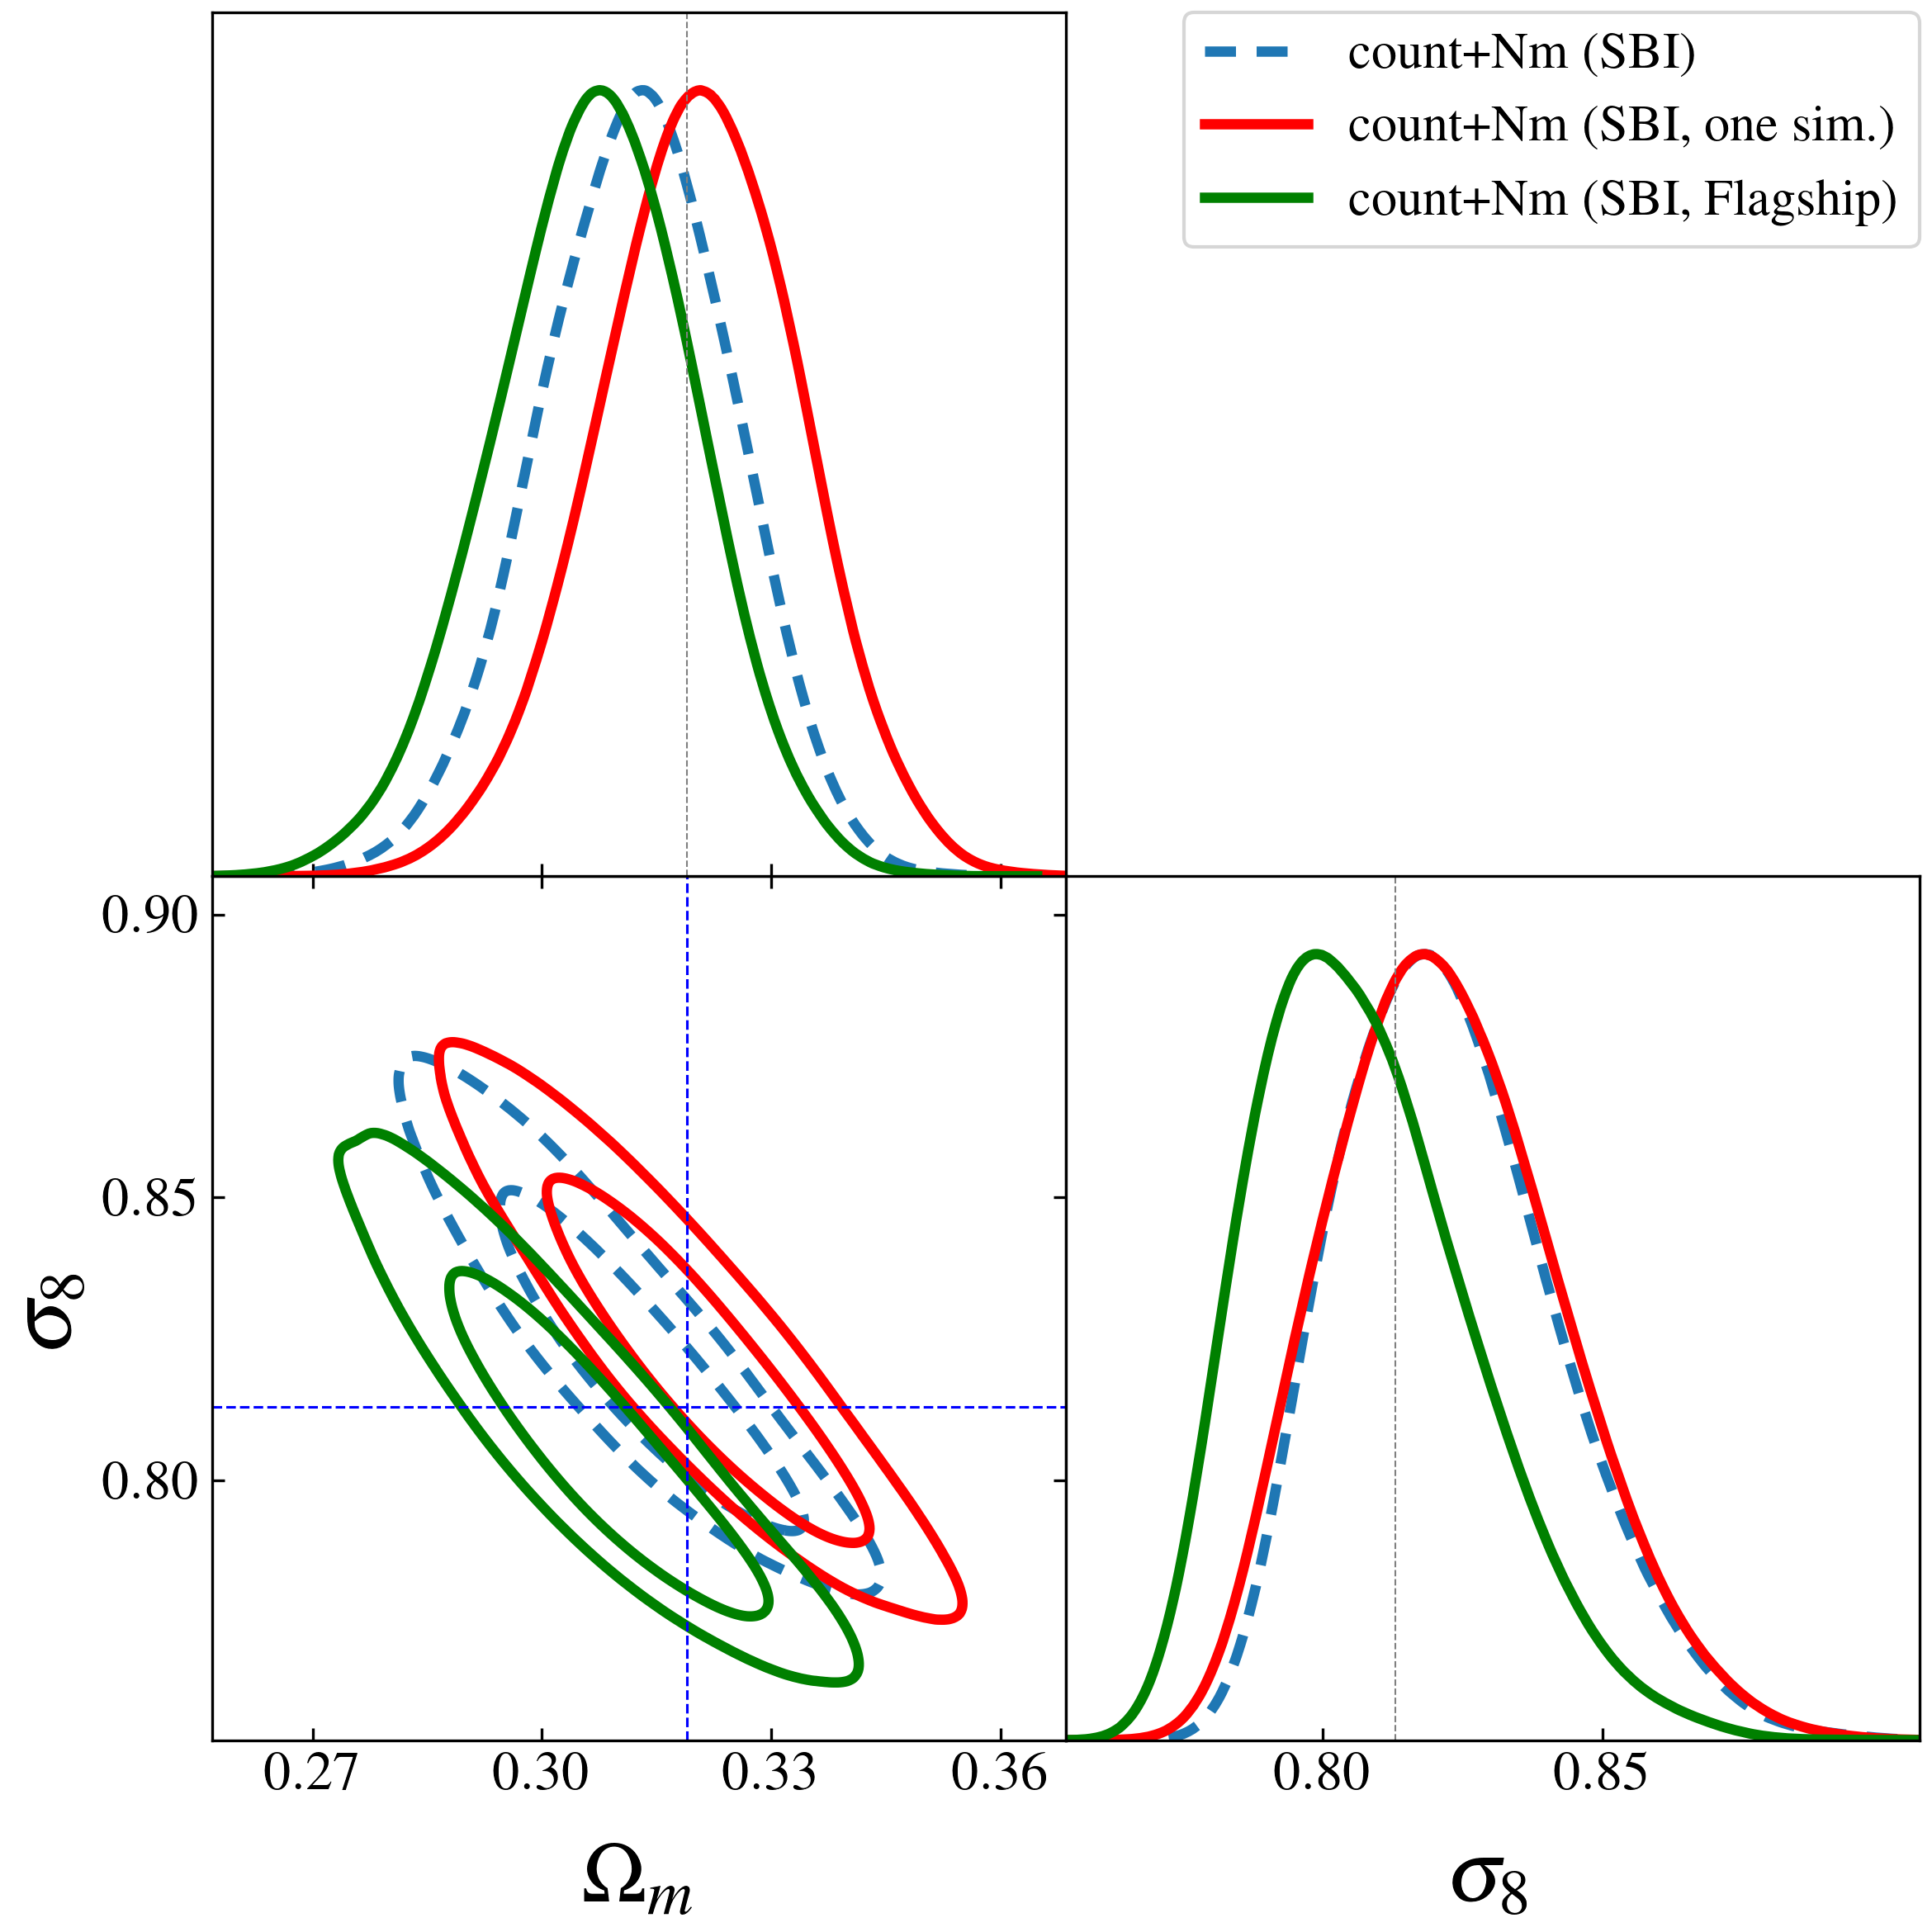

In [58]:
g = plots.get_subplot_plotter(subplot_size=4)
g.settings.lab_fontsize = 25
g.settings.axes_fontsize = 16
g.settings.legend_fontsize = 15
marker_args = {'lw':0.75, 'markersize':0.75, 'ls':'--','color':'b'}
#range_ = {'1':[0.2, 0.5], '2':[0.6,0.9], '3':[2.5,4.5], '4':[1, 2.5],'5':[-1,1], '6':[0.1, 0.5], }
g.triangle_plot([count_Nm, count_Nm_onesim,count_Nm_flagship],
                filled=[False, False, False,False, False, False], 
                contour_colors = ['C0', 'r', 'g','b', 'k', 'g',  ], 
                contour_ls=['--','-','-','-','-','--',],
                contour_lws=[3,3,3,1,1.5,1.5],
                #shaded=[False, False, True],
                legend_fontsize = 10,
                params=['1','2'
                       ],
                markers=markers,
                #param_limits = range_,
                fine_bins = 5,  
                marker_args = marker_args)
plt.savefig(f'mcmc_sbi_flagship.png', dpi = 300)

In [17]:
list_chains = [N, Nm, count_Nm, N_masked, log10m, N_log10m, count_Nm_onesim,count_Nm_flagship]
for chain in list_chains:
    means = chain.mean(['1', '2', '3', '4', '5', '6'])
    errors = np.diagonal(chain.cov(['1', '2', '3', '4', '5', '6']))**.5
    a = str(chain.label)
    for i, n in enumerate(['1', '2', '3', '4', '5', '6']):
        a += f' & ${means[i]:.2f} \pm {errors[i]:.2f}$ '
    a += '\{}'.format('\\')
    print(a)

count (SBI) & $0.34 \pm 0.06$  & $0.84 \pm 0.06$  & $3.40 \pm 0.17$  & $1.70 \pm 0.08$  & $-0.03 \pm 0.18$  & $0.21 \pm 0.05$ \\
Nm (SBI) & $0.31 \pm 0.03$  & $0.80 \pm 0.07$  & $3.53 \pm 0.25$  & $1.65 \pm 0.14$  & $-0.09 \pm 0.22$  & $0.24 \pm 0.08$ \\
count+Nm (SBI) & $0.31 \pm 0.01$  & $0.82 \pm 0.02$  & $3.47 \pm 0.07$  & $1.70 \pm 0.05$  & $-0.05 \pm 0.09$  & $0.21 \pm 0.05$ \\
count-masked (SBI) & $0.33 \pm 0.06$  & $0.84 \pm 0.06$  & $3.42 \pm 0.17$  & $1.69 \pm 0.10$  & $-0.05 \pm 0.22$  & $0.22 \pm 0.05$ \\
log10m (SBI) & $0.33 \pm 0.06$  & $0.87 \pm 0.04$  & $3.53 \pm 0.06$  & $1.73 \pm 0.05$  & $0.06 \pm 0.08$  & $0.20 \pm 0.05$ \\
count+log10m masked (SBI) & $0.31 \pm 0.01$  & $0.83 \pm 0.02$  & $3.44 \pm 0.06$  & $1.68 \pm 0.05$  & $-0.08 \pm 0.09$  & $0.24 \pm 0.04$ \\
count+Nm (SBI, one sim.) & $0.32 \pm 0.01$  & $0.82 \pm 0.02$  & $3.45 \pm 0.07$  & $1.70 \pm 0.05$  & $-0.06 \pm 0.10$  & $0.23 \pm 0.05$ \\
count+Nm (SBI, Flagship) & $0.31 \pm 0.01$  & $0.81 \pm 0.02$  

In [18]:
list_chains = [N_mcmc, m_mcmc, Nm_mcmc,]
for chain in list_chains:
    means = chain.mean(['1', '2', '3', '4', '5', '6'])
    errors = np.diagonal(chain.cov(['1', '2', '3', '4', '5', '6']))**.5
    a = str(chain.label)
    for i, n in enumerate(['1', '2', '3', '4', '5', '6']):
        a += f' & ${means[i]:.2f} \pm {errors[i]:.2f}$ '
    a += '\{}'.format('\\')
    print(a)

count (MCMC) & $0.33 \pm 0.05$  & $0.82 \pm 0.05$  & $3.46 \pm 0.14$  & $1.71 \pm 0.08$  & $-0.01 \pm 0.18$  & $0.21 \pm 0.06$ \\
log10m (MCMC) & $0.32 \pm 0.07$  & $0.82 \pm 0.05$  & $3.50 \pm 0.06$  & $1.72 \pm 0.04$  & $-0.00 \pm 0.08$  & $0.20 \pm 0.05$ \\
count+log10m (MCMC) & $0.32 \pm 0.01$  & $0.82 \pm 0.01$  & $3.49 \pm 0.04$  & $1.71 \pm 0.03$  & $-0.01 \pm 0.06$  & $0.21 \pm 0.03$ \\


In [128]:
n_cut=490000
settings={'mult_bias_correction_order':0,'smooth_scale_2D':3, 'smooth_scale_1D':4, 'boundary_correction_order':0}
path = '../../capish_sbi_data/config_sbi_selection_bias_corrected_standard_prior_7_params/samples_of_{}_posterior_with_data_flagship_like_sim.pkl'

t = np.load(path.format('count_Nm'), allow_pickle = True)
print(t.shape)
count_Nm_selection_bias = MCSamples(samples=t[n_cut:],names = names + ['7'], 
                    labels = labels  + [r'\rho'], 
                     settings=settings, 
                     label=r'count+Nm with free selection bias (SBI)')

(500000, 7)
Removed no burn in


In [129]:
n_cut = 490000
path = '../../capish_sbi_data/config_sbi_selection_bias_default_corrected_standard_prior_6_params/samples_of_{}_posterior_with_data_flagship_like_sim.pkl'

t = np.load(path.format('count_Nm'), allow_pickle=True)

# add dummy parameter column
empty_col = np.full((t.shape[0], 1), 0)
t_extended = np.hstack((t, empty_col))
t_extended[:,6] = t_extended[:,1]

count_Nm_no_selection_bias = MCSamples(
    samples=t_extended[n_cut:],
    names=names + ['7'],
    labels=labels + [r'\rho'],
    settings=settings,
    label=r'count+Nm with selection bias fixed (SBI)'
)

Removed no burn in


In [130]:
count_Nm_no_selection_bias.cov('7')

array([[0.00023359]])

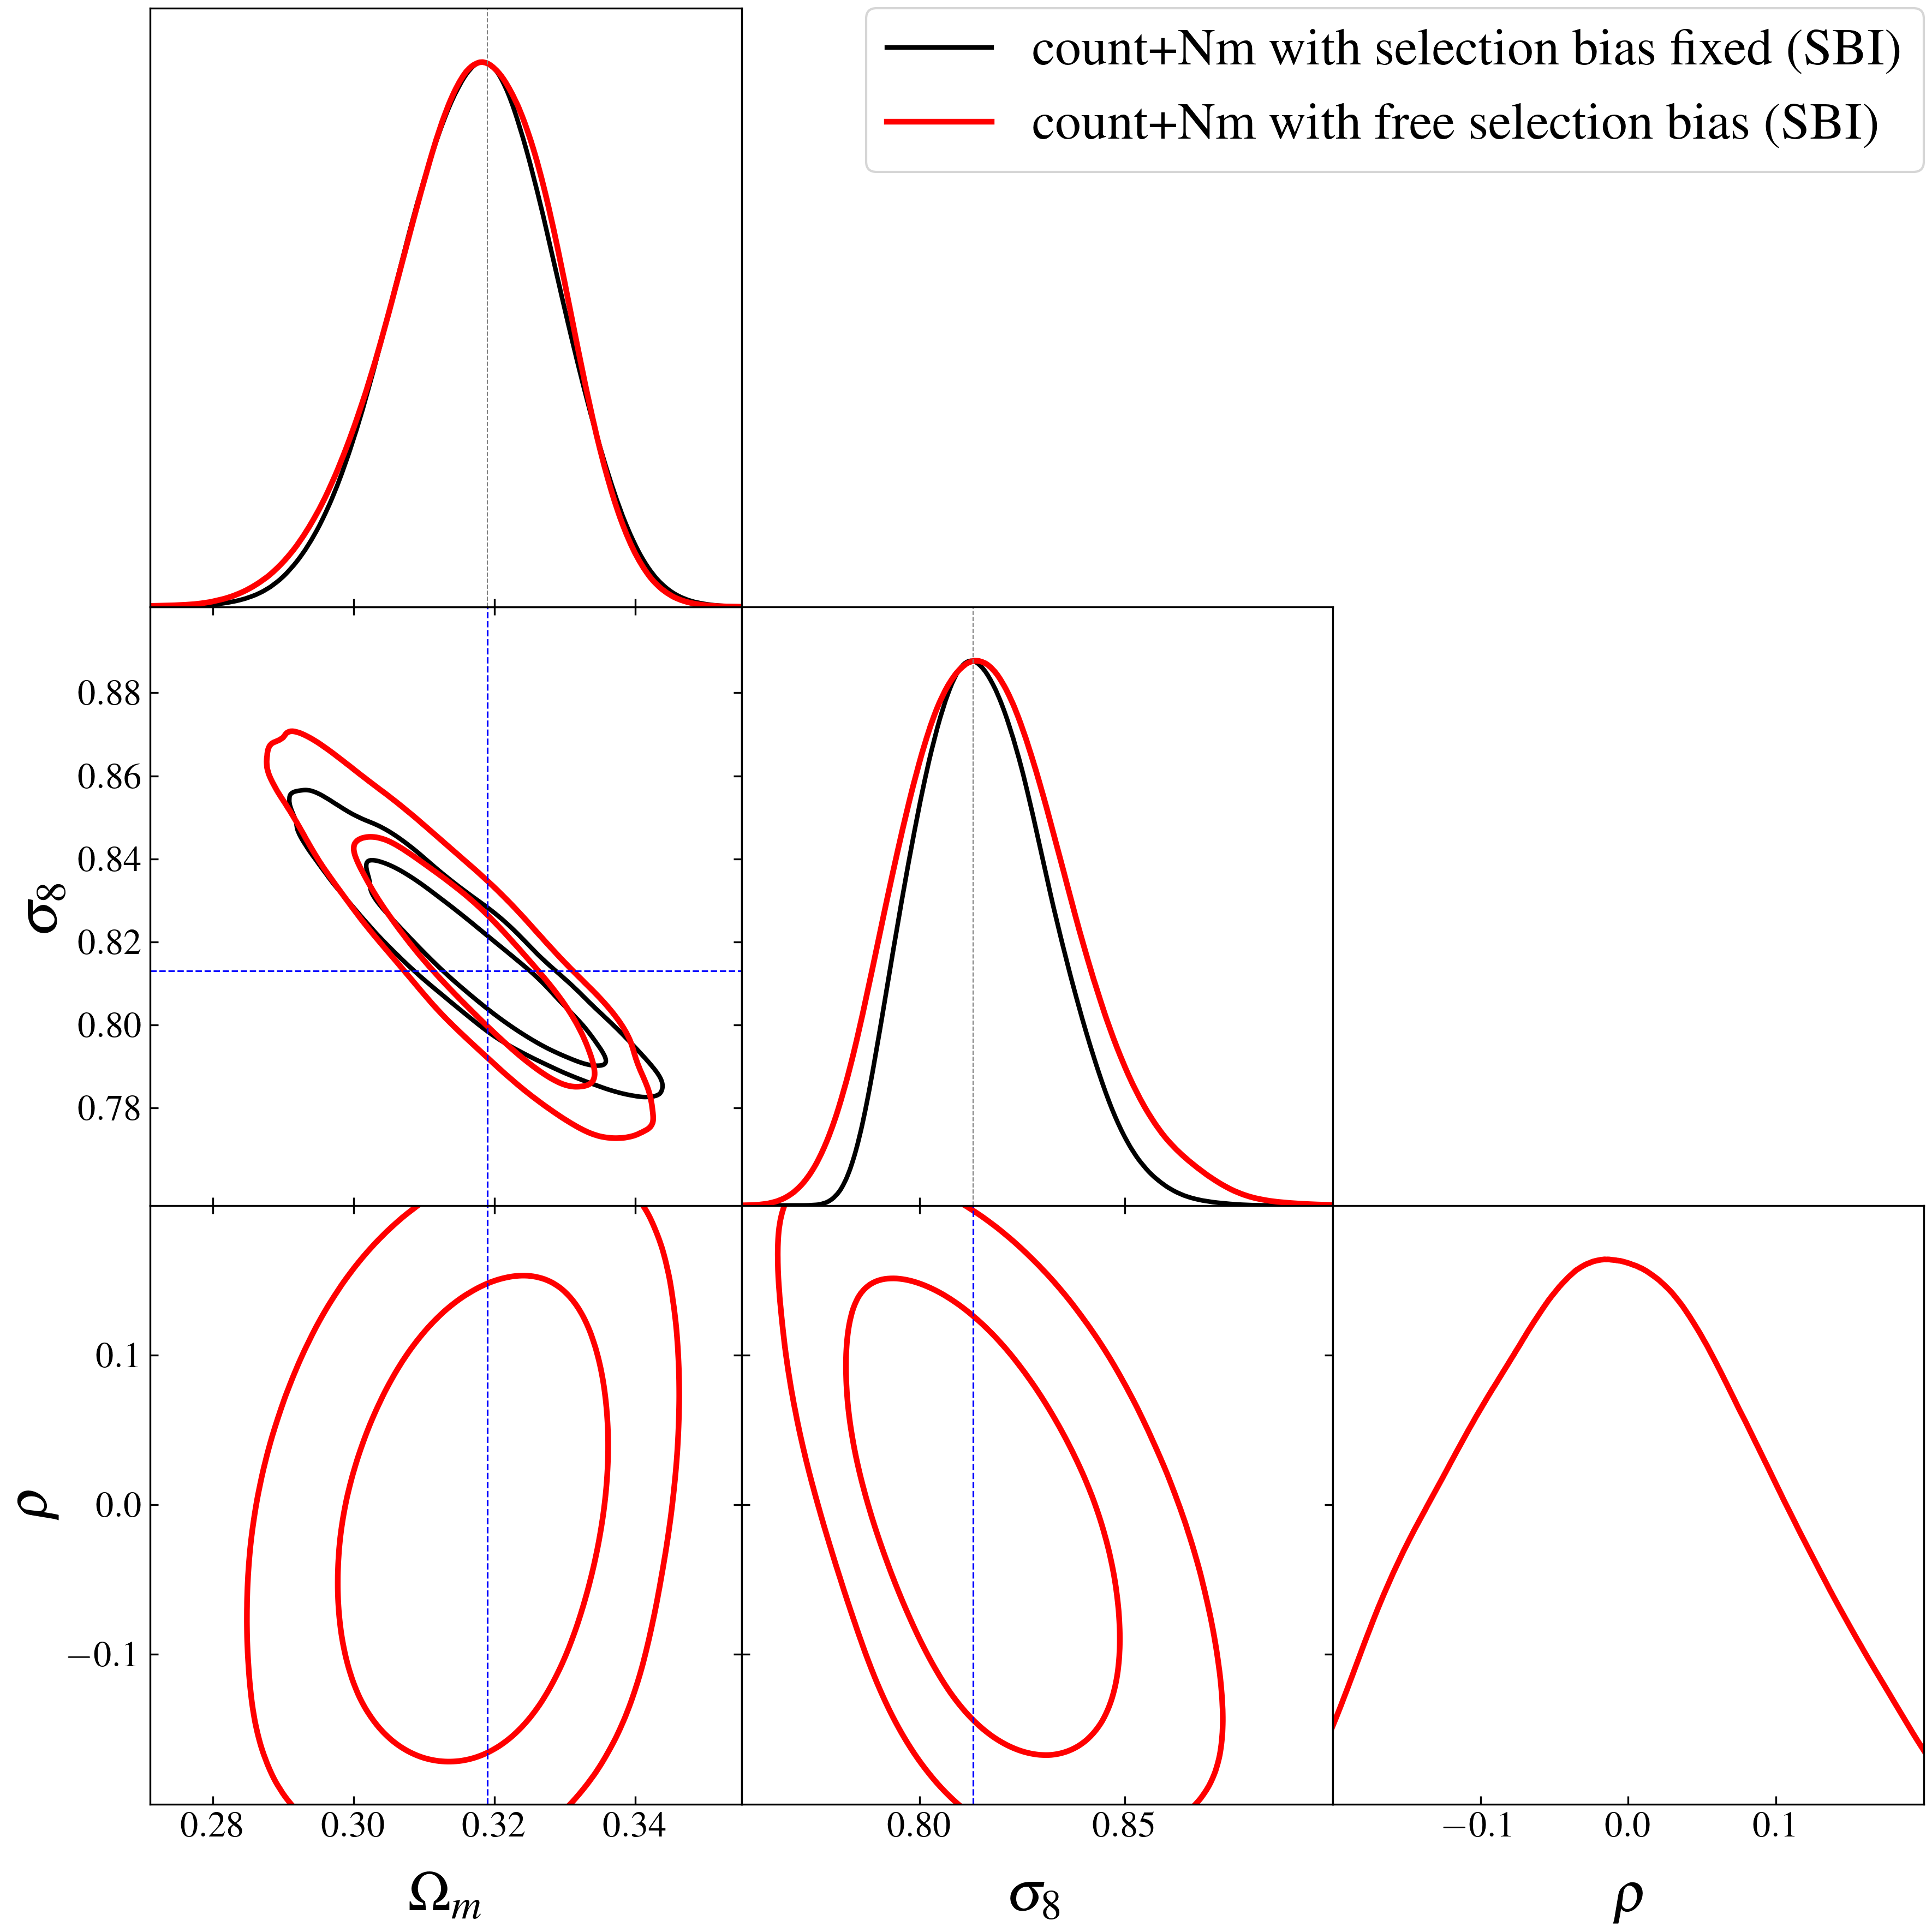

In [131]:
g = plots.get_subplot_plotter(subplot_size=4)
g.settings.lab_fontsize = 25
g.settings.axes_fontsize = 16
g.settings.legend_fontsize = 23
marker_args = {'lw':0.75, 'markersize':0.75, 'ls':'--','color':'b'}
#range_ = {'1':[0.2, 0.5], '2':[0.6,0.9], '3':[2.5,4.5], '4':[1, 2.5],'5':[-1,1], '6':[0.1, 0.5], }
g.triangle_plot([count_Nm_no_selection_bias, count_Nm_selection_bias , ],
                filled=[False, False, False,False, False, False], 
                contour_colors = ['k', 'r', 'g','b', 'k', 'g',  ], 
                contour_ls=['-','-','-','-','-','--',],
                contour_lws=[2,2.5,3,1,1.5,1.5],
                #shaded=[False, False, True],
                legend_fontsize = 10,
                params=['1','2','7'
                       ],
                markers=markers,
                param_limits = {'7': [-0.2, 0.2]},
                fine_bins = 5,  
                marker_args = marker_args)
plt.savefig(f'mcmc_sbi_selection_bias.png', dpi = 300)